# System Identification With Python

I need to analyse some data. This is part of that analysis.

Would You Like To Know More: 

- https://www.youtube.com/watch?v=9itsq4_qNZo
- http://lpsa.swarthmore.edu/Transient/TransInputs/TransStep.html
- https://ocw.mit.edu/courses/mathematics/18-03sc-differential-equations-fall-2011/unit-iii-fourier-series-and-laplace-transform/unit-step-and-unit-impulse-response/MIT18_03SCF11_s25_2text.pdf
- http://web.mit.edu/2.151/www/Handouts/FirstSecondOrder.pdf


## Part 1: Generate Fake Data

To identify data we need to have some known data to identify.

In [21]:
# Parallel Path
import control.matlab
from scipy import signal
#
import numpy as np
import matplotlib
%matplotlib inline
def pct_err(experimental, theoretical):
    return np.abs((experimental-theoretical)/theoretical) * 100

In [22]:
import random

### First Order System

In [23]:
K = random.randint(1, 10)
tau = random.randint(1, 10)
t0  = 1
dT = 1e-2

In [24]:
sys1 = control.matlab.tf(K, [tau, 1])
sys2 = signal.lti(K, [tau, 1])

In [25]:
T = np.arange(0, t0+tau*10, dT)

In [26]:
X = np.zeros(np.shape(T))

In [27]:
X[T>=t0]=1

In [28]:
Y1, T1, xout = control.matlab.lsim(sys1, U=X, T=T, X0=X[0])

In [29]:
T2a, Y2a, xout = signal.lsim(sys2, U=X, T=T, X0=X[0])
T2b, Y2b, xout = signal.lsim2(sys2, U=X, T=T, X0=X[0])

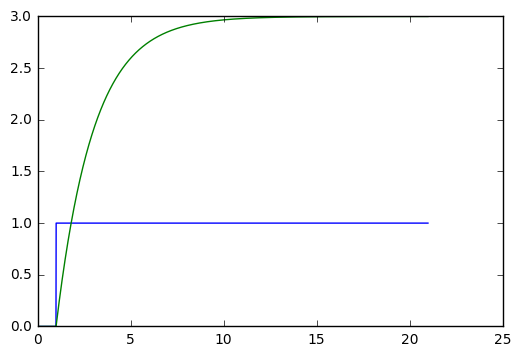

In [30]:
matplotlib.pyplot.plot(T2a, X, T2a, Y2a)

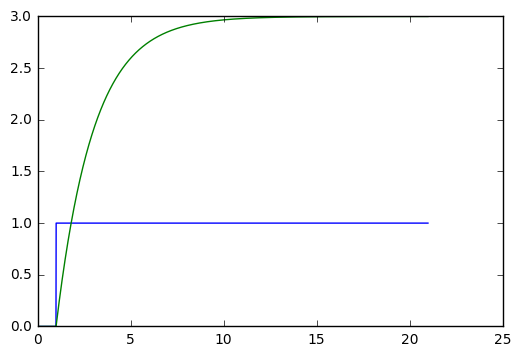

In [31]:
matplotlib.pyplot.plot(T2b, X, T2b, Y2b)

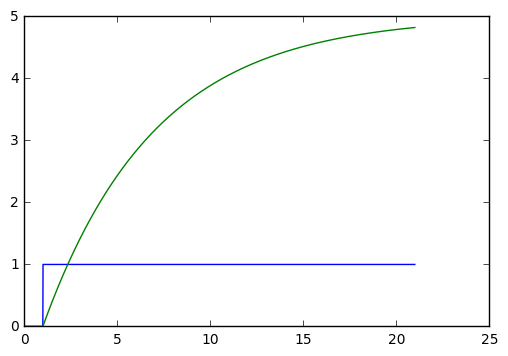

In [32]:
y = signal.lfilter(sys1_d.num[0][0], sys1_d.den[0][0], X)
matplotlib.pyplot.plot(T,X,T,y)

### Part 2: Analyze Fake Data

In [33]:
def stepID1(T, X, Y):
    X_0 = X[0]
    X_final = X[-1]

    Y_0 = Y[0]
    Y_final = Y[-1]
    tau_est = list()

    K_est = (Y_final-Y_0) / (X_final - X_0)

    for i in range(1,4):
        Y_ = (1-np.exp(-i))*(Y_final-Y_0)
        idx1 = np.where(Y_>=Y1)[0][-1]
        idx2 = np.where(Y_<=Y1)[0][0]

        tau_est.append(T[idx1]/i)
        tau_est.append(T[idx2]/i)
    tau_est = np.mean(tau_est)

    return K_est, tau_est

In [34]:
X = np.array([0, 1])

In [35]:
(K, tau)

(3, 2)

In [36]:
stepID1(T, X, Y1)

(2.9998634591430973, 2.6080555555555556)

In [37]:
stepID1(T, X, Y2a)

(2.9998634591430973, 2.6080555555555556)

In [39]:
stepID1(T, X, Y2b)

(2.9998634441955954, 2.6080555555555556)